# Import Libraries

In [95]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsClassifier

%matplotlib inline

# Load Datasets

In [3]:
df =pd.read_csv("insurance.csv")
df.head()

,age,sex,bmi,children,smoker,region,expenses
0,19,female,27.9,0,yes,southwest,16884.92
1,18,male,33.8,1,no,southeast,1725.55
2,28,male,33.0,3,no,southeast,4449.46
3,33,male,22.7,0,no,northwest,21984.47
4,32,male,28.9,0,no,northwest,3866.86


In [4]:
df.shape

(1338, 7)

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   expenses  1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [8]:
df.describe(include='all')

,age,sex,bmi,children,smoker,region,expenses
count,1338.000000,1338,1338.000000,1338.000000,1338,1338,1338.000000
unique,NaN,2,NaN,NaN,2,4,NaN
top,NaN,male,NaN,NaN,no,southeast,NaN
freq,NaN,676,NaN,NaN,1064,364,NaN
mean,39.207025,NaN,30.665471,1.094918,NaN,NaN,13270.422414
std,14.049960,NaN,6.098382,1.205493,NaN,NaN,12110.011240
min,18.000000,NaN,16.000000,0.000000,NaN,NaN,1121.870000
25%,27.000000,NaN,26.300000,0.000000,NaN,NaN,4740.287500
50%,39.000000,NaN,30.400000,1.000000,NaN,NaN,9382.030000
75%,51.000000,NaN,34.700000,2.000000,NaN,NaN,16639.915000


In [13]:
# missing values
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
expenses    0
dtype: int64

In [14]:
df.shape

(1338, 7)

In [17]:
# check dupicate and delete
#df.duplicated()
df = df.drop_duplicates()

In [18]:
df.shape

(1337, 7)

# Data Analysis

C:\Users\rka_rahul\AppData\Local\Temp\ipykernel_4524\657573881.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[x],ax=axes[0],kde = False)
C:\Users\rka_rahul\AppData\Local\Temp\ipykernel_4524\657573881.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[x],ax=axes[0],kde = False)
C:\Use

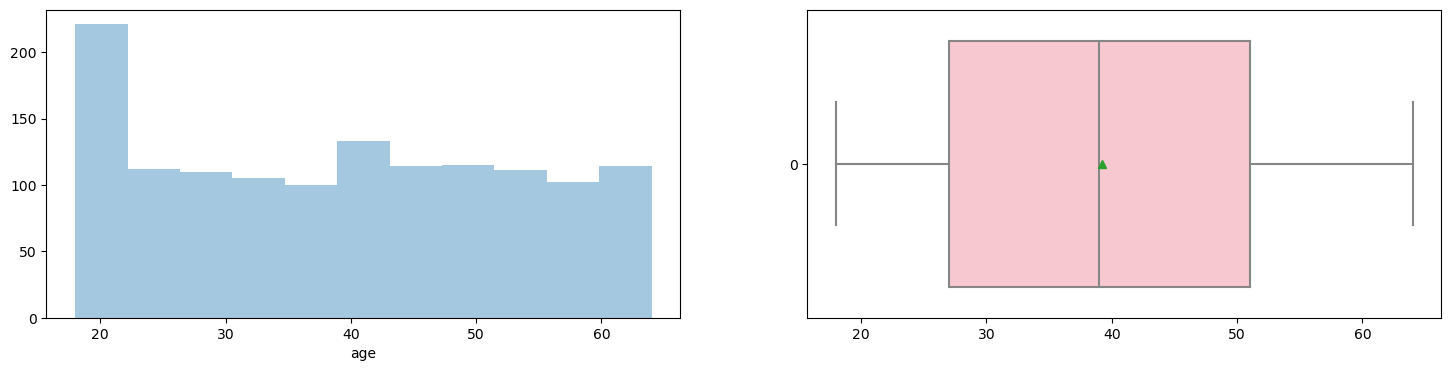

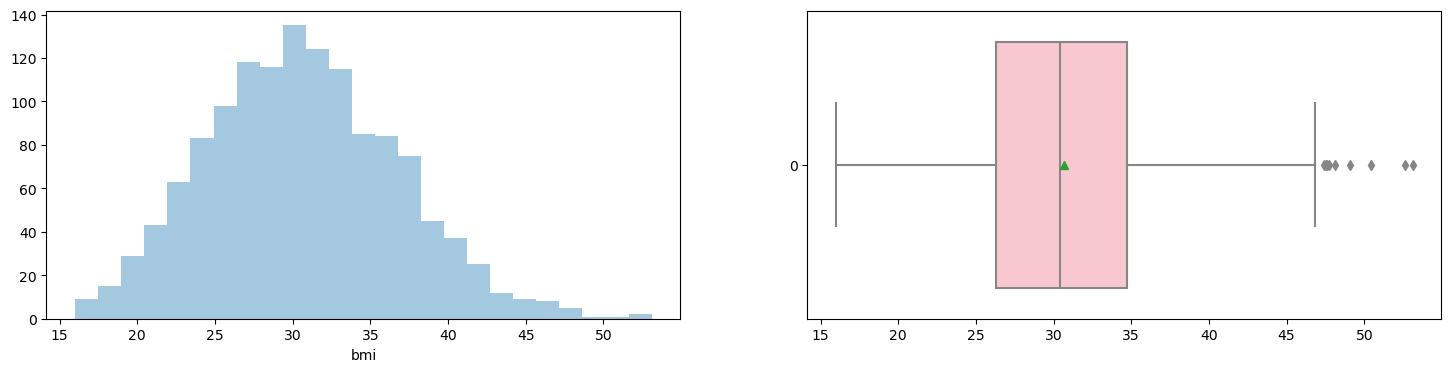

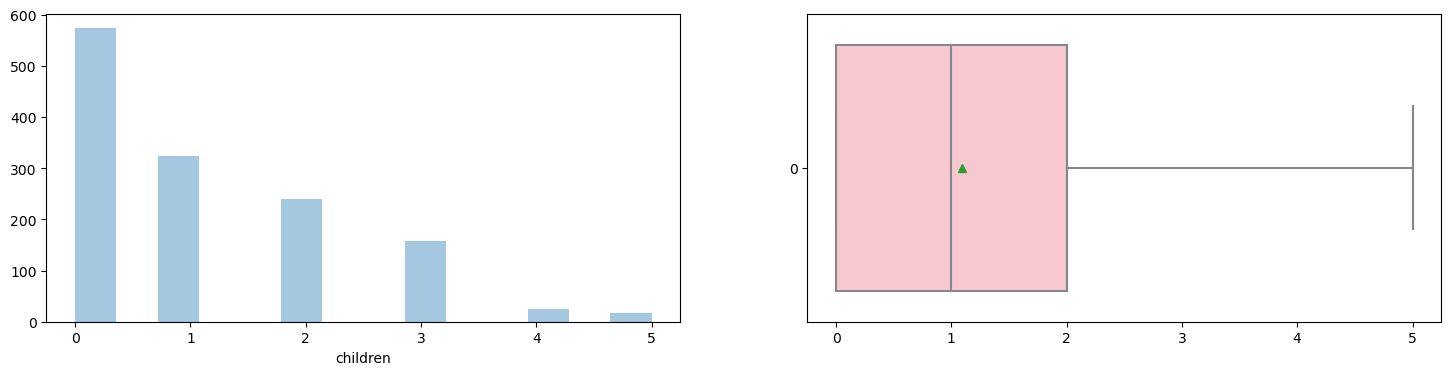

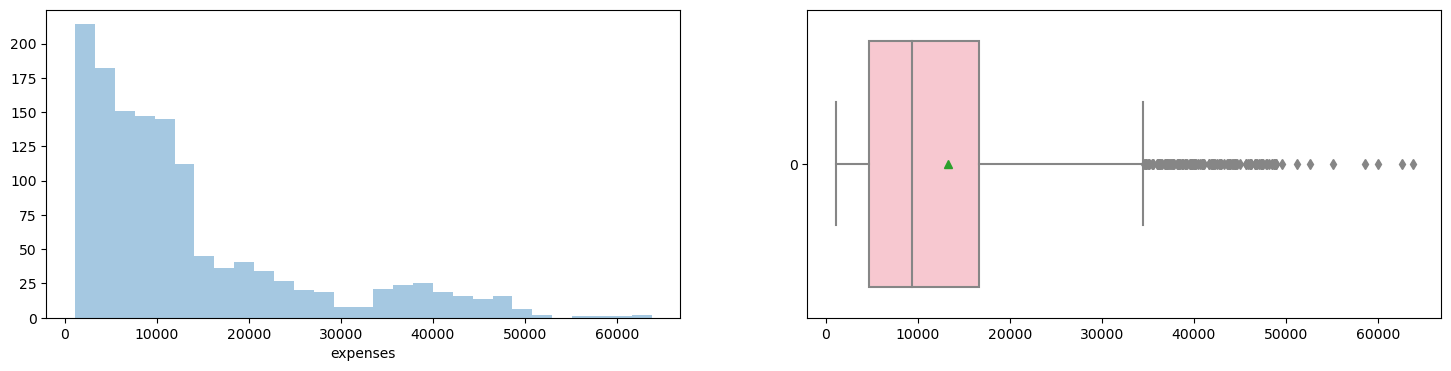

In [20]:
x_axis = ['age','bmi','children','expenses']

for x in x_axis:
    fig,axes = plt.subplots(1,2,figsize=(18,4))
    sns.distplot(df[x],ax=axes[0],kde = False)
    sns.boxplot(df[x],ax=axes[1],orient='h',showmeans=True,color='pink')

# Handle Catgorical Columns

In [21]:
df.head()

,age,sex,bmi,children,smoker,region,expenses
0,19,female,27.9,0,yes,southwest,16884.92
1,18,male,33.8,1,no,southeast,1725.55
2,28,male,33.0,3,no,southeast,4449.46
3,33,male,22.7,0,no,northwest,21984.47
4,32,male,28.9,0,no,northwest,3866.86


### Using LableEncoder

In [22]:
df.sex.unique()

array(['female', 'male'], dtype=object)

In [23]:
df['sex'] = df.sex.map({'female':0, 'male':1})

C:\Users\rka_rahul\AppData\Local\Temp\ipykernel_4524\3910503926.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['sex'] = df.sex.map({'female':0, 'male':1})


In [24]:
df.head()

,age,sex,bmi,children,smoker,region,expenses
0,19,0,27.9,0,yes,southwest,16884.92
1,18,1,33.8,1,no,southeast,1725.55
2,28,1,33.0,3,no,southeast,4449.46
3,33,1,22.7,0,no,northwest,21984.47
4,32,1,28.9,0,no,northwest,3866.86


In [25]:
df.smoker.unique()

array(['yes', 'no'], dtype=object)

In [27]:
df['smoker'] = df.smoker.map({'yes':1,'no':0})

C:\Users\rka_rahul\AppData\Local\Temp\ipykernel_4524\4471774.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['smoker'] = df.smoker.map({'yes':1,'no':0})


In [28]:
df.head()

,age,sex,bmi,children,smoker,region,expenses
0,19,0,27.9,0,1,southwest,16884.92
1,18,1,33.8,1,0,southeast,1725.55
2,28,1,33.0,3,0,southeast,4449.46
3,33,1,22.7,0,0,northwest,21984.47
4,32,1,28.9,0,0,northwest,3866.86


In [29]:
df.region.unique()

array(['southwest', 'southeast', 'northwest', 'northeast'], dtype=object)

In [30]:
df['region'] = df.region.map({'southwest':1,'southeast':2,'northwest':3,'northeast':4})

C:\Users\rka_rahul\AppData\Local\Temp\ipykernel_4524\2217749727.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['region'] = df.region.map({'southwest':1,'southeast':2,'northwest':3,'northeast':4})


In [31]:
df.head()

,age,sex,bmi,children,smoker,region,expenses
0,19,0,27.9,0,1,1,16884.92
1,18,1,33.8,1,0,2,1725.55
2,28,1,33.0,3,0,2,4449.46
3,33,1,22.7,0,0,3,21984.47
4,32,1,28.9,0,0,3,3866.86


In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1337 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1337 non-null   int64  
 1   sex       1337 non-null   int64  
 2   bmi       1337 non-null   float64
 3   children  1337 non-null   int64  
 4   smoker    1337 non-null   int64  
 5   region    1337 non-null   int64  
 6   expenses  1337 non-null   float64
dtypes: float64(2), int64(5)
memory usage: 115.9 KB


# Model Traning

### Split the dataset in x and y

In [52]:
X = df.iloc[:,:-1].values
y = df.iloc[:,-1].values
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [53]:
X_train.shape

(1069, 6)

In [54]:
X_test.shape

(268, 6)

## LinearRegression Model Traning

In [84]:
model1 = LinearRegression()
model1.fit(X_train,y_train)


p_tr = model1.score(X_train,y_train)
p_te = model1.score(X_test,y_test,)
print(p_tr)
print(p_te)

0.7297457314007713
0.8068280291899952


## SVM Model Traning

In [85]:
model2 = SVR()
model2.fit(X_train,y_train)


p_tr = model2.score(X_train,y_train)
p_te = model2.score(X_test,y_test,)
print(p_tr)
print(p_te)

-0.10151113953443303
-0.1344469486786597


## KNeighborsClassifier Model Traning

In [96]:
model4 = RandomForestRegressor()
model4.fit(X_train,y_train)


p_tr = model4.score(X_train,y_train)
p_te = model4.score(X_test,y_test,)
print(p_tr)
print(p_te)

0.9757666246469856
0.8827917742640876


## RandomForestRegressor Model Traning

In [86]:
model3 = RandomForestRegressor()
model3.fit(X_train,y_train)


p_tr = model3.score(X_train,y_train)
p_te = model3.score(X_test,y_test,)
print(p_tr)
print(p_te)

0.9746980217367522
0.8828456000694399


### Predict Charges in new Customer

In [92]:
data = {
        'age':float(input("Enter age")),
        'sex':float(input("Enter sex")),
        'bmi':float(input("Enter bmi")),
        'children':float(input("Enter children")),
        'smoker':float(input("Enter smoker")),
        'region':float(input("Enter region"))
}
new_df = pd.DataFrame(data,index=[0])
new_df

Enter age 19
Enter sex 0
Enter bmi 27.9
Enter children 0
Enter smoker 1
Enter region 1


,age,sex,bmi,children,smoker,region
0,19.0,0.0,27.9,0.0,1.0,1.0


In [98]:
pred = model3.predict(new_df)
pred

C:\Users\rka_rahul\anaconda3\Lib\site-packages\sklearn\base.py:457: UserWarning: X has feature names, but RandomForestRegressor was fitted without feature names
  warnings.warn(


array([16973.2881])

# Model Devployment Using Joblib

In [94]:
import joblib

In [ ]:
joblib.dump(model3,'random_forest_regressor')